# 데이터 불러오기

In [87]:
import os 

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [88]:
data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract= True
)

In [89]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])

In [90]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r") as file:
            data["review"].append(file.read())

    return pd.DataFrame.from_dict(data)
    

In [91]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [92]:
train_df.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [93]:
reviews = list(train_df.review)
reviews[0]

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

# 데이터 분석

In [94]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]
tokenized_reviews[0]

['For',
 'a',
 'movie',
 'that',
 'gets',
 'no',
 'respect',
 'there',
 'sure',
 'are',
 'a',
 'lot',
 'of',
 'memorable',
 'quotes',
 'listed',
 'for',
 'this',
 'gem.',
 'Imagine',
 'a',
 'movie',
 'where',
 'Joe',
 'Piscopo',
 'is',
 'actually',
 'funny!',
 'Maureen',
 'Stapleton',
 'is',
 'a',
 'scene',
 'stealer.',
 'The',
 'Moroni',
 'character',
 'is',
 'an',
 'absolute',
 'scream.',
 'Watch',
 'for',
 'Alan',
 '"The',
 'Skipper"',
 'Hale',
 'jr.',
 'as',
 'a',
 'police',
 'Sgt.']

In [95]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token[:10]

[52, 166, 55, 442, 144, 90, 112, 117, 485, 55]

In [96]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
review_len_by_eumjeol[:10]

[233, 868, 264, 2155, 640, 414, 537, 533, 2308, 221]

Text(0, 0.5, 'Number of Reviews')

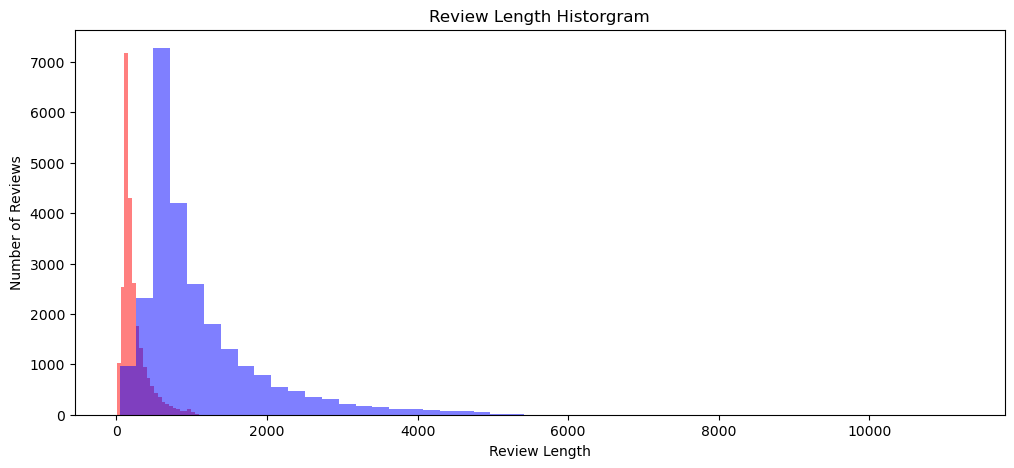

In [97]:
# 로그 변환 시 음수에 대한 값을 표한할 수 없으며 nonposy 는 더이상 지원되지 않는 기능
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
# plt.yscale('log', nonposy= 'clip')
plt.title('Review Length Historgram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

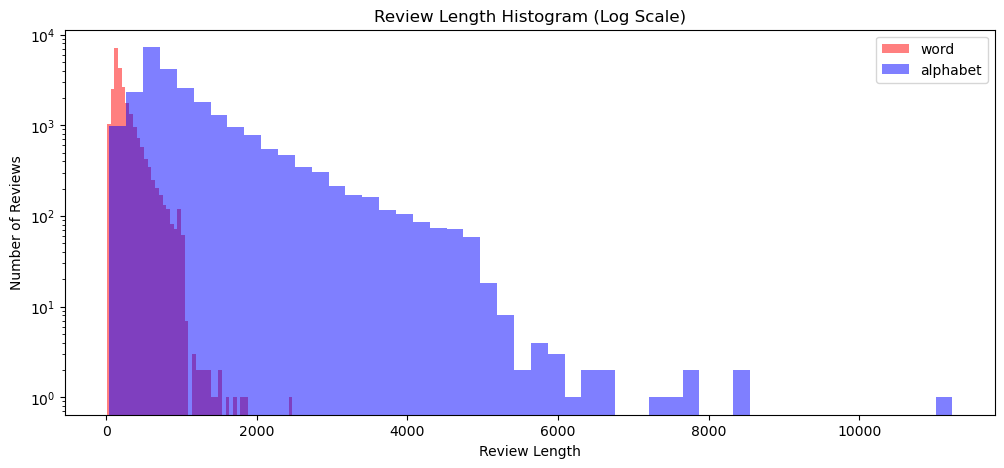

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 0 또는 음수 값을 작은 양수 값으로 대체
review_len_by_token_plt = np.where(np.array(review_len_by_token) <= 0, 1e-10, review_len_by_token)
review_len_by_eumjeol_plt = np.where(np.array(review_len_by_eumjeol) <= 0, 1e-10, review_len_by_eumjeol)

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token_plt, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol_plt, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log')
plt.title('Review Length Histogram (Log Scale)')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


In [99]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x36e8ea110>,
 'caps': [<matplotlib.lines.Line2D at 0x36e8eb5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x36e895d90>],
 'medians': [<matplotlib.lines.Line2D at 0x36e8fc710>],
 'fliers': [<matplotlib.lines.Line2D at 0x36e8fd5d0>],
 'means': [<matplotlib.lines.Line2D at 0x36e8fcf10>]}

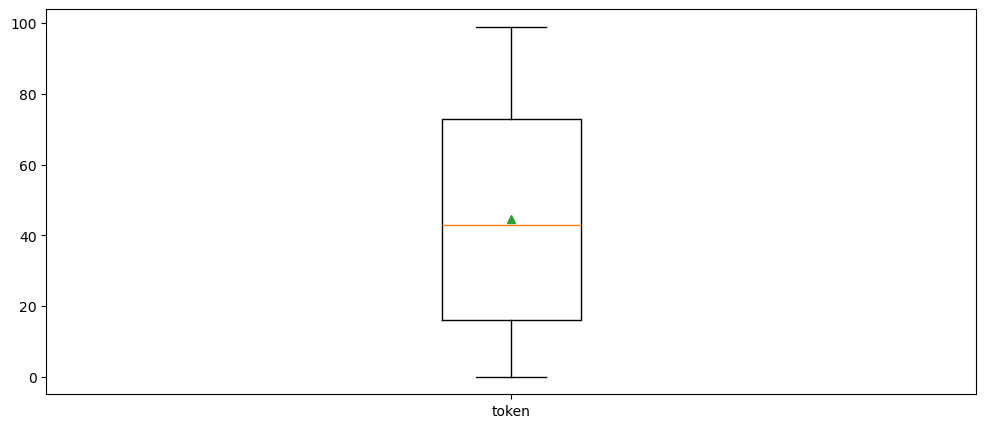

In [46]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x36ec45b90>,
 'caps': [<matplotlib.lines.Line2D at 0x36ec46e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x36e64aed0>],
 'medians': [<matplotlib.lines.Line2D at 0x36ec47d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x36ec54d10>],
 'means': [<matplotlib.lines.Line2D at 0x36ec54550>]}

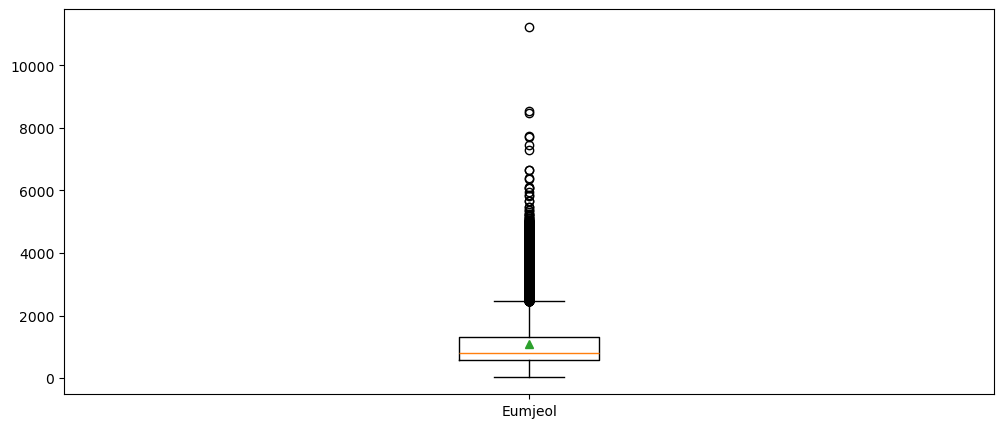

In [47]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

# 워드 클라우드

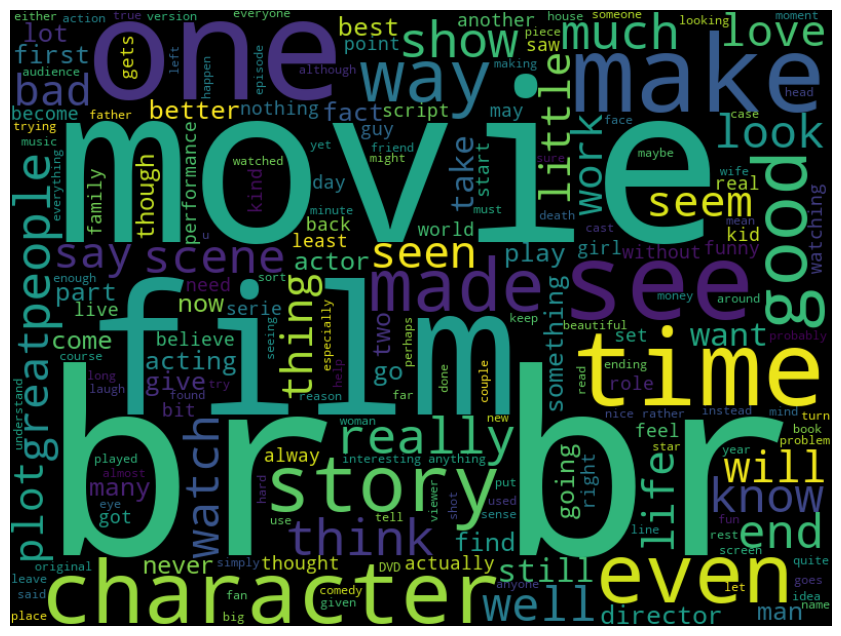

In [107]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# WordCloud 객체 생성
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(train_df['review']))

# WordCloud 출력
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 긍정 부정 분포

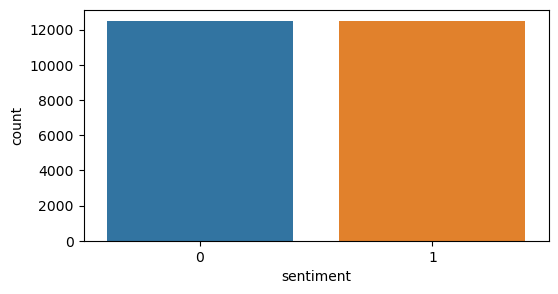

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment 카운트 시각화
sentiment = train_df['sentiment'].value_counts()

# 서브플롯 생성
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)

# Countplot 생성
sns.countplot(data=train_df, x='sentiment', ax=ax)

# 그래프 출력
plt.show()
